# Linear Regression with multiple variables

In [1]:
#plot gradient descent and cost function

# 1. Loading data

In [2]:
#Loading data
with open('ex1data2.txt', 'r') as f:
	lines = f.readlines()

In [3]:
y = []
raw_x = []
x1 = []
x2 = []
for i in range(len(lines)):
    line = lines[i].split(",")
    x1.append(float(line[0]))
    x2.append(float(line[1]))
    y.append(float(line[2][:-1]))

In [4]:
raw_x.append(x1)
raw_x.append(x2)

# 2. Visualization

In [5]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(raw_x[0], y, 'bo')
plt.title('x1 vs. y')

Text(0.5,1,'x1 vs. y')

Text(0.5,1,'x2 vs. y')

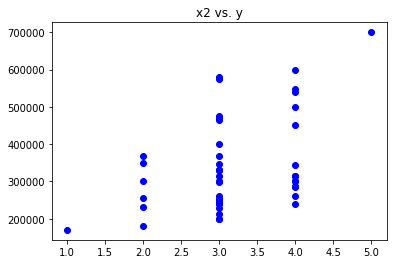

In [6]:
plt.plot(raw_x[1], y, 'bo')
plt.title('x2 vs. y')

# 3. Preprocessing of data

# 3.1 Normalization
Normalization helps gradient descent converge quickly.
Source to read about standard deviation: http://vortex.ihrc.fiu.edu/MET4570/members/Lectures/Lect05/m10divideby_nminus1.pdf

In [7]:
#My standard deviation function through variance
def myStd(array, mean):
    m = len(array)
    sum = 0
    for i in range(m):
        sum += (array[i] - mean) ** 2
    var = sum/(m - 1)
    std = var ** (1/2)
    return std 

In [8]:
#My mean function
def myMean(array):
    m = len(array)
    sum = 0
    for i in range(m):
        sum += array[i]
    return sum/m

In [9]:
#My normalization function
def myNorm(array, mean, std):
    m = len(array)
    x_norm = []
    for i in range(m):
        value = (array[i] - mean)/std
        x_norm.append(value)
    return x_norm

In [10]:
myMean1 = myMean(raw_x[0])
myMean2 = myMean(raw_x[1])

In [11]:
myStd1 = myStd(raw_x[0], myMean1)
myStd2 = myStd(raw_x[1], myMean2)

In [12]:
x1_norm = myNorm(raw_x[0], myMean1, myStd1)
x2_norm = myNorm(raw_x[1], myMean2, myStd2)

In [13]:
raw_x_norm = []
raw_x_norm.append(x1_norm)
raw_x_norm.append(x2_norm)

# 3.2 Augmentation

In [14]:
#My augmentation function (adding 1 to x)
def myAug(raw_x):
    x_aug = []
    m = len(raw_x[0]) #number of samples
    n = len(raw_x) #number of features
    x_ones = []
    for i in range(m):
        x_ones.append(1)
    x_aug.append(x_ones)
    for j in range(n):
        x_aug.append(raw_x[j])
    return x_aug

In [15]:
#Augmented x with 1 as first row
x_aug = myAug(raw_x_norm)

# 3.3 Initialization of theta

In [16]:
#My function for initialization of theta with zeros
def myTheta(x_aug):
    myTheta = []
    n = len(x_aug)
    for i in range(n):
        myTheta.append(0)
    return myTheta

In [17]:
x_aug

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [0.13000986907454054,
  -0.5041898382231769,
  0.502476363836692,
  -0.7357230646969468,
  1.2574760153815938,
  -0.019731728481864972,
  -0.5872397998931161,
  -0.7218814044186236,
  -0.7810230437896409,
  -0.6375731099961096,
  -0.0763567023477326,
  -0.0008567371932424295,
  -0.13927333997647443,
  3.117291823687202,
  -0.9219563120780225,
  0.3766430885792084,
  -0.856523008944131,
  -0.9622229601604173,
  0.7654679091248329,
  1.2964843307114138,
  -0.2940482685431793,
  -0.1417900054816241,
  -0.4991565072128776,
  -0.048673381791086205,
  2.377392165173198,
  -1.133356214510595,
  -0.6828730890888036,
  0.6610262906611214,
  0.2508098133217248,
  0.8007012261969283,
  -0.20344831035779107,
  -1.2591894897680787,
  0.04947657290975102,
  1.4298676

In [18]:
theta = myTheta(x_aug)
theta

[0, 0, 0]

# 4. Cost Function

In [19]:
#My dot prodoct function for vectors
#The first vector should be transpose i.e. theta = [0,0,0]
#While, the second vector should be x = [[1],[2104],[3]]
def myDot(theta, x_sample):
    sum = 0
    for i in range(len(theta)):
        sum += (theta[i] * x_sample[i][0])
    return sum

In [20]:
#My Cost Function for linear regression
def myCost(x, y, theta):
    m = len(y) #number of samples
    n = len(theta) #number of features
    sum = 0
    for i in range(m):
        h = 0
        for j in range(n):
            h += theta[j] * x[j][i] 
        sum += (h - y[i]) ** 2
    sum = sum / (2 * m)
    return sum

In [21]:
myCost(x_aug, y, theta)

65591548106.45744

# 5. Gradient Descent

In [22]:
theta = [0, 0, 0]

In [23]:
#My Gradient Descent function
def gradDes(x, y , theta, alpha):
    m = len(y)
    n = len(theta)
    #new_theta = [0,0,0]
    
    sum0 = 0
    sum1 = 0
    sum2 = 0
    for i in range(m):
        h = theta[0] * x[0][i] + theta[1] * x[1][i] + theta[2] * x[2][i]
        sum0 += (h - y[i]) * x[0][i]
        sum1 += (h - y[i]) * x[1][i]
        sum2 += (h - y[i]) * x[2][i]
    temp0 = theta[0] - alpha * (1/m) * sum0
    temp1 = theta[1] - alpha * (1/m) * sum1
    temp2 = theta[2] - alpha * (1/m) * sum2
    
    theta[0] = temp0
    theta[1] = temp1
    theta[2] = temp2
    return theta

In [24]:
for j in range(50):
    theta = gradDes(x_aug, y, theta, 0.3)

In [25]:
theta

[340412.6534522654, 110572.961930871, -6591.385922849891]

In [26]:
myCost(x_aug, y, theta)

2043281503.795087

# 5.1 The results 

#### for j in range(50):
    theta = gradDes(x_aug, y, theta, 0.3)
    
#### theta = [340412.6534522654, 110572.961930871, -6591.385922849891]
#### myCost(x_aug, y, theta) = 2043281503.795087

# 6. Testing

In [48]:
theta = [0,0,0]

In [49]:
def arrayOfCosts(iterations, theta, alpha, x):
    theta = [0,0,0]
    epochs = 0
    costPerIter = []
    arrayOfepochs = []
    
    while epochs <= iterations:
        arrayOfepochs.append(epochs)
        
        for j in range(epochs):
            theta = gradDes(x, y, theta, alpha)
        cost = myCost(x, y, theta)
        
        theta = [0,0,0] #for any other iteration it should start initialized, the graph of iterations over trained
        #one is almost similar, but it is not true
        costPerIter.append(cost)
        epochs +=1
    return costPerIter, arrayOfepochs

Try to change the values of the learning rate (alpha), it will affect the graph of iterations vs. cost value

In [50]:
costs = arrayOfCosts(50, theta, 0.3, x_aug)

In [51]:
costs

([65591548106.45744,
  32769251589.54679,
  17162371138.600994,
  9610212673.430882,
  5903790708.923928,
  4060267654.650727,
  3129447146.6880794,
  2650518225.9363256,
  2397952577.212392,
  2260458549.1141615,
  2182619809.255922,
  2136527325.8193688,
  2107908134.5360575,
  2089308029.5591478,
  2076723134.9966106,
  2067924519.0177345,
  2061617330.513367,
  2057013351.5682864,
  2053609759.0722368,
  2051071751.0708978,
  2049168226.1967423,
  2047735102.1875796,
  2046653425.1510618,
  2045835672.8210433,
  2045216790.7554276,
  2044748092.0833366,
  2044392973.223324,
  2044123832.4776125,
  2043919815.4197152,
  2043765145.4172893,
  2043647877.3685925,
  2043558962.3183067,
  2043491542.8908665,
  2043440421.3400977,
  2043401657.311019,
  2043372263.3824353,
  2043349974.4721787,
  2043333073.112773,
  2043320257.0250063,
  2043310538.7322645,
  2043303169.4547253,
  2043297581.4067214,
  2043293344.0451488,
  2043290130.8948874,
  2043287694.3937252,
  2043285846.8179502,

Text(0.5,1,'Iterations vs Cost Value')

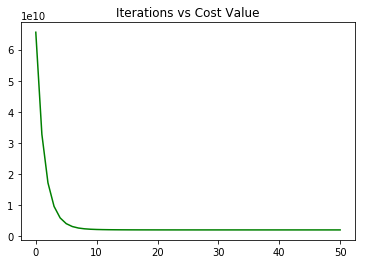

In [52]:
plt.plot(costs[1], costs[0], 'g')
plt.title('Iterations vs Cost Value')

# 6.1 Testing without normalization
Since it has been said that normalization makes gradient descent to converge quickly.
Thus, without it gradient descent should be slow. Let's see:

In [32]:
raw_x

[[2104.0,
  1600.0,
  2400.0,
  1416.0,
  3000.0,
  1985.0,
  1534.0,
  1427.0,
  1380.0,
  1494.0,
  1940.0,
  2000.0,
  1890.0,
  4478.0,
  1268.0,
  2300.0,
  1320.0,
  1236.0,
  2609.0,
  3031.0,
  1767.0,
  1888.0,
  1604.0,
  1962.0,
  3890.0,
  1100.0,
  1458.0,
  2526.0,
  2200.0,
  2637.0,
  1839.0,
  1000.0,
  2040.0,
  3137.0,
  1811.0,
  1437.0,
  1239.0,
  2132.0,
  4215.0,
  2162.0,
  1664.0,
  2238.0,
  2567.0,
  1200.0,
  852.0,
  1852.0,
  1203.0],
 [3.0,
  3.0,
  3.0,
  2.0,
  4.0,
  4.0,
  3.0,
  3.0,
  3.0,
  3.0,
  4.0,
  3.0,
  3.0,
  5.0,
  3.0,
  4.0,
  2.0,
  3.0,
  4.0,
  4.0,
  3.0,
  2.0,
  3.0,
  4.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  2.0,
  1.0,
  4.0,
  3.0,
  4.0,
  3.0,
  3.0,
  4.0,
  4.0,
  4.0,
  2.0,
  3.0,
  4.0,
  3.0,
  2.0,
  4.0,
  3.0]]

In [33]:
#Augmented x with 1 as first row
x_no_norm = myAug(raw_x)
x_no_norm

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [2104.0,
  1600.0,
  2400.0,
  1416.0,
  3000.0,
  1985.0,
  1534.0,
  1427.0,
  1380.0,
  1494.0,
  1940.0,
  2000.0,
  1890.0,
  4478.0,
  1268.0,
  2300.0,
  1320.0,
  1236.0,
  2609.0,
  3031.0,
  1767.0,
  1888.0,
  1604.0,
  1962.0,
  3890.0,
  1100.0,
  1458.0,
  2526.0,
  2200.0,
  2637.0,
  1839.0,
  1000.0,
  2040.0,
  3137.0,
  1811.0,
  1437.0,
  1239.0,
  2132.0,
  4215.0,
  2162.0,
  1664.0,
  2238.0,
  2567.0,
  1200.0,
  852.0,
  1852.0,
  1203.0],
 [3.0,
  3.0,
  3.0,
  2.0,
  4.0,
  4.0,
  3.0,
  3.0,
  3.0,
  3.0,
  4.0,
  3.0,
  3.0,
  5.0,
  3.0,
  4.0,
  2.0,
  3.0,
  4.0,
  4.0,
  3.0,
  2.0,
  3.0,
  4.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  2.0,
  1.0,
  4.0,
  3.0,
  4.0,
  3.0,
  3.0,
  4.0,
  4.0,
  4.0,
  2.0,
  3.0,


In [34]:
costs_no_norm = arrayOfCosts(50, theta, 0.1, x_no_norm)

OverflowError: (34, 'Numerical result out of range')

The reason of the error above is that wihtout normalization the calculated values are so huge that they are 'Numerical result out of range'.
https://stackoverflow.com/questions/12666600/overflowerror-numerical-result-out-of-range-when-generating-fibonacci-numbers

# 7. Viewing arrays with pandas

In [35]:
import pandas as pd

In [36]:
x_aug_df = pd.DataFrame(x_aug)

In [37]:
x_aug_df

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.130010,-0.504190,0.502476,-0.735723,1.257476,-0.019732,-0.587240,-0.721881,-0.781023,-0.637573,...,0.165243,2.786350,0.202993,-0.423657,0.298626,0.712618,-1.007523,-1.445423,-0.187090,-1.003748
2,-0.223675,-0.223675,-0.223675,-1.537767,1.090417,1.090417,-0.223675,-0.223675,-0.223675,-0.223675,...,1.090417,1.090417,1.090417,-1.537767,-0.223675,1.090417,-0.223675,-1.537767,1.090417,-0.223675


In [38]:
x_no_norm_df = pd.DataFrame(x_no_norm)

In [39]:
x_no_norm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2104.0,1600.0,2400.0,1416.0,3000.0,1985.0,1534.0,1427.0,1380.0,1494.0,...,2132.0,4215.0,2162.0,1664.0,2238.0,2567.0,1200.0,852.0,1852.0,1203.0
2,3.0,3.0,3.0,2.0,4.0,4.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,2.0,3.0,4.0,3.0,2.0,4.0,3.0


# The End.